# DAT565 Assignment 2 – Group 43

- Student 1 - Luca Modica - (5 hours)
- Student 2 - Hugo Alves Henriques E Silva - (5 hours)
- Student 3 - YenPo Lin - (5 hours)

September 8, 2023

## Introduction

WRITE THE INTRODUCTION HERE

## Importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# config inline plots
%matplotlib inline

# set seaborn style
sns.set_style('darkgrid')

## Part 1: Regression

WRITE ABOUT THE REGRESSION TASK INTRODUCTION HERE

### Import Datasets

In [4]:
hemnet_df =pd.read_csv('../datasets/hemnet.csv')
hemnet_df.head()

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000


### 1. Find a linear regression model that relates the living area to the selling price. If in doing so, you performed any data cleaning step(s), describe what you did and explain why.

### Data cleaning and data selection

Regarding data cleaning and data selection, we selected the `Living_area` and `Selling_price` as those are the 2 features we are going to build our regression model around.

In [5]:
regression_hemnet_df = hemnet_df[['Living_area', 'Selling_price']] 

After that, we check for null values to make sure that we are reading consistent data using the `isnull()` function.

In [6]:
regression_hemnet_df.isnull().sum()

Living_area      0
Selling_price    0
dtype: int64

### Data visualization

After doing the data cleaning, we would like to visualize our dataframe in order to have a clear inspection on it.

- x axis: Living_area

- y axis: price

we also define a plot function to avoid repeating the code when every time we need to do so.

- xAxis: Xinput

- yAxis: Yinput

- title: the title of the graph

- xlabel: label depends on the xAxis input

- ylabel: label depends on the yAxis input

In [7]:
def make_scatter_plot(xAxis, yAxis, title, xlabel, ylabel, axes=None):
    if axes is None:
        sns.scatterplot(x=xAxis, y=yAxis)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
    else:
        sns.scatterplot(x=xAxis, y=yAxis, ax=axes)
        axes.set_title(title)
        axes.set_xlabel(xlabel)
        axes.set_ylabel(ylabel)

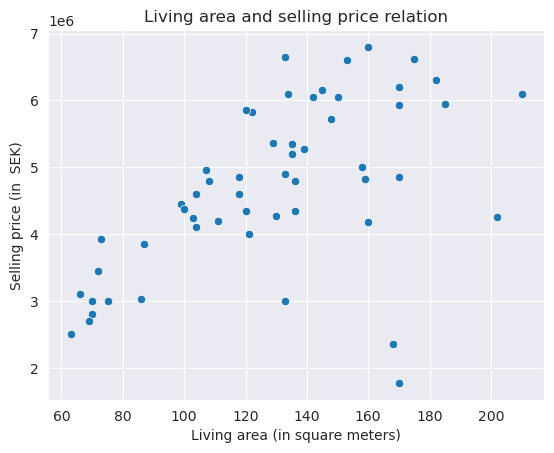

In [8]:
make_scatter_plot(
    regression_hemnet_df['Living_area'], 
    regression_hemnet_df['Selling_price'],
    'Living area and selling price relation',
    'Living area (in square meters)',
    'Selling price (in  SEK)'
)

Finally,we imported the LinearRegression model from sklearn library and feed the data into the trained Regression Model.

In [9]:
lr_model = LinearRegression().fit(
    regression_hemnet_df['Living_area'].values.reshape(-1, 1),
    regression_hemnet_df['Selling_price'].values
)

Lastly, we save in separate variables the true value of the target (that is, the **Selling_price** column) and the predicted value of our model. They will be used in later questions.

In [10]:
true_target_values = regression_hemnet_df['Selling_price']
prdicted_target_values = lr_model.predict(regression_hemnet_df['Selling_price'].values.reshape(-1, 1))

### 2. What are the values of the slope and intercept of the regression line?

After the computation, the model returned a set of results. They consist of multiple slopes of the regression line and its intercept. Those values will be taken from `lr_model.coef_[0]` and `lr_model.intercept_`.

In [11]:
print(f'Most desirable Slope of the regression line: {lr_model.coef_[0]}')
print(f'Most desirable Intercept of the regression line: {lr_model.intercept_}')

Most desirable Slope of the regression line: 19370.138547331582
Most desirable Intercept of the regression line: 2220603.2433558684


Since the model we used is a linear regression model and applied on a two dimensional data, from the slope and intercept we obtained. The function can be defined as below:

In [12]:
def linear_function(x, m, b):
    return m * x + b

def y_line(x_line, m, b):
    return [linear_function(x, m, b) for x in x_line]

Till this step, we can plot the regression line on the scatter plot

<Axes: title={'center': 'Living area and selling price relation'}, xlabel='Living area (in square meters)', ylabel='Selling price (in  SEK)'>

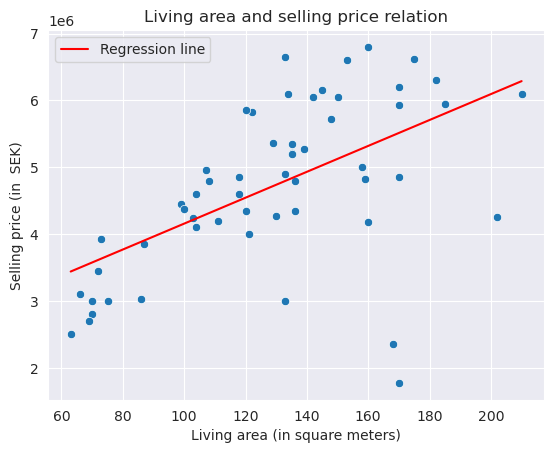

In [13]:
make_scatter_plot(
    regression_hemnet_df['Living_area'], 
    regression_hemnet_df['Selling_price'],
    'Living area and selling price relation',
    'Living area (in square meters)',
    'Selling price (in  SEK)'
)

# create the regression line
sns.lineplot(
    x=regression_hemnet_df['Living_area'], 
    y=y_line(regression_hemnet_df['Living_area'], lr_model.coef_[0], lr_model.intercept_), 
    label=f'Regression line', 
    color='red'
)

### 3. Use this model to predict the selling prices of houses which have living area 100 m2, 150 m2, and 200 m2.

To predict the selling prices of living area 100 m2,150 m2 and 200m2, the value of them would be on the regression line. Hence the code below is just plug value into the `linear_function` defined above. Also rounding the number into 2 decimal places.

In [14]:
# I change to the ".predict" because the question says that we have to use the model, not a custom defined function
# print(f'The predicted price for 100 m^2 is: {round(linear_function(100,lr_model.coef_[0],lr_model.intercept_),2)} m^2')
# print(f'The predicted price for 150 m^2 is: {round(linear_function(150,lr_model.coef_[0],lr_model.intercept_),2)} m^2')
# print(f'The predicted price for 200 m^2 is: {round(linear_function(200,lr_model.coef_[0],lr_model.intercept_),2)} m^2')
print(f'The predicted price for 100 m^2 is: {round(lr_model.predict(np.array([[100]]))[0], 2)} m^2')
print(f'The predicted price for 150 m^2 is: {round(lr_model.predict(np.array([[150]]))[0], 2)} m^2')
print(f'The predicted price for 200 m^2 is: {round(lr_model.predict(np.array([[200]]))[0], 2)} m^2')

The predicted price for 100 m^2 is: 4157617.1 m^2
The predicted price for 150 m^2 is: 5126124.03 m^2
The predicted price for 200 m^2 is: 6094630.95 m^2


### 4. Draw a residual plot. Discuss some potential strategies for improving the model.

At this point of the analysis, we will draw the residual plot related to the prediction of our linear regression model. Plotting the residuals will be used to perform the model checking (in other words, see how good the model was at the predictions) of the Linear Regression. 

Before drawing the plot, we standardize the residual points to have a better interpretation of the values.

In [15]:
# function to compute the residual
def residuals(y_actual, y_predicted):
    return np.array([
        regression_hemnet_df['Selling_price'].values - lr_model.predict(regression_hemnet_df['Selling_price'].values.reshape(-1, 1))
    ]).flatten()

In [16]:
standardized_residuals = StandardScaler().fit_transform(
    residuals(
        regression_hemnet_df['Selling_price'], 
        lr_model.predict(regression_hemnet_df['Selling_price'].values.reshape(-1, 1))
    ).reshape(-1, 1)
)

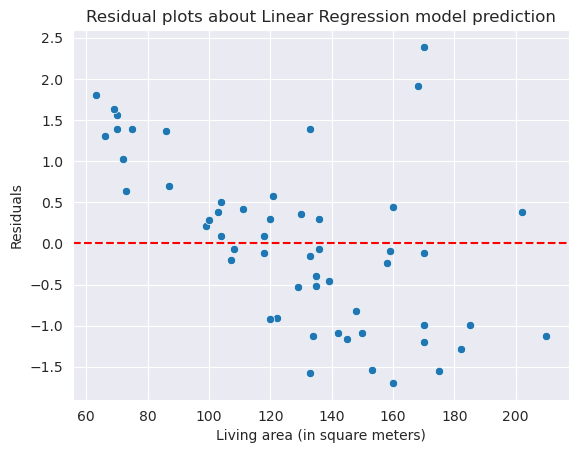

In [17]:
make_scatter_plot(
    regression_hemnet_df['Living_area'],
    standardized_residuals.flatten(),
    'Residual plots about Linear Regression model prediction',
    'Living area (in square meters)',
    'Residuals'
)
plt.axhline(y=0,color='red',linestyle='--')
plt.show()

There are 2 things that we can look for to make sure that we got a good residual plot:

- having as many points as possible close to the red line (that is, the more a point is near to zero, the less is the residual value).
- having a symmetrical distribution of the points around zero, since It would indicate that the linear relationship between the feature and the target variable is appropriate.

In [18]:
# compute the mse of the first model
mse = mean_squared_error(true_target_values, prdicted_target_values)
print(mse)

8.901689558381599e+21


#### Possible developments to further improve the model

There are several ways and technique to improve a linear regression model. Also related to the result obtained by our model and the residual plot, there could be several strategies to improve the linear regression:

- **checking for outliers in the dataset**. We can take advatage of the the already trained model and remove the datapoints that have the higher squared residuals.
- since our case It's a simple linear regression, **we can add more higher-order variables to add new features**. In other words, starting from the columns that we already have, we can apply feature engineering techniques to try better fir our datapoints.
- another useful strategy can also be **adding novel information to our model, using for example the other features of the Hemnet dataset for training**. In adding new features It's important to check their correlation: having highly correlated features means that they say the same thing for the selling price prediction, so they are redundant.    

#### Test improve the model removing outliers

In [121]:
# removing outliers, by using the squared residuals and removing the biggest 10%
initial_datapoints = regression_hemnet_df.shape[0]
squared_residuals = np.square((true_target_values - prdicted_target_values))

df = pd.concat(
    [regression_hemnet_df, pd.DataFrame({'squared_residual': squared_residuals})], axis=1
).sort_values(by='squared_residual')

# now we drop the 10% of the datapoints with the highest squared residusals -> outliers
df_no_outliers = df.head(int(len(df) * 0.90)).drop('squared_residual', axis=1)

print(f'{initial_datapoints - df_no_outliers.shape[0]} outliers dropped')

6 outliers dropped


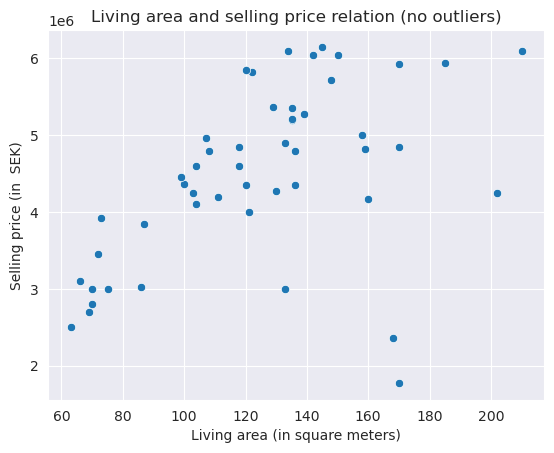

In [122]:
# scatterplot without the outliers
make_scatter_plot(
    df_no_outliers['Living_area'], 
    df_no_outliers['Selling_price'],
    'Living area and selling price relation (no outliers)',
    'Living area (in square meters)',
    'Selling price (in  SEK)'
)

In [123]:
# try a new linear regression model and compare to the initial one
lr_model_no_outliers = LinearRegression().fit(
    df_no_outliers['Living_area'].values.reshape(-1, 1),
    df_no_outliers['Selling_price']
)

In [124]:
true_target_values_no_outliers = df_no_outliers['Selling_price']
prdicted_target_values_no_outliers = lr_model_no_outliers.predict(
    df_no_outliers['Selling_price'].values.reshape(-1, 1)
)

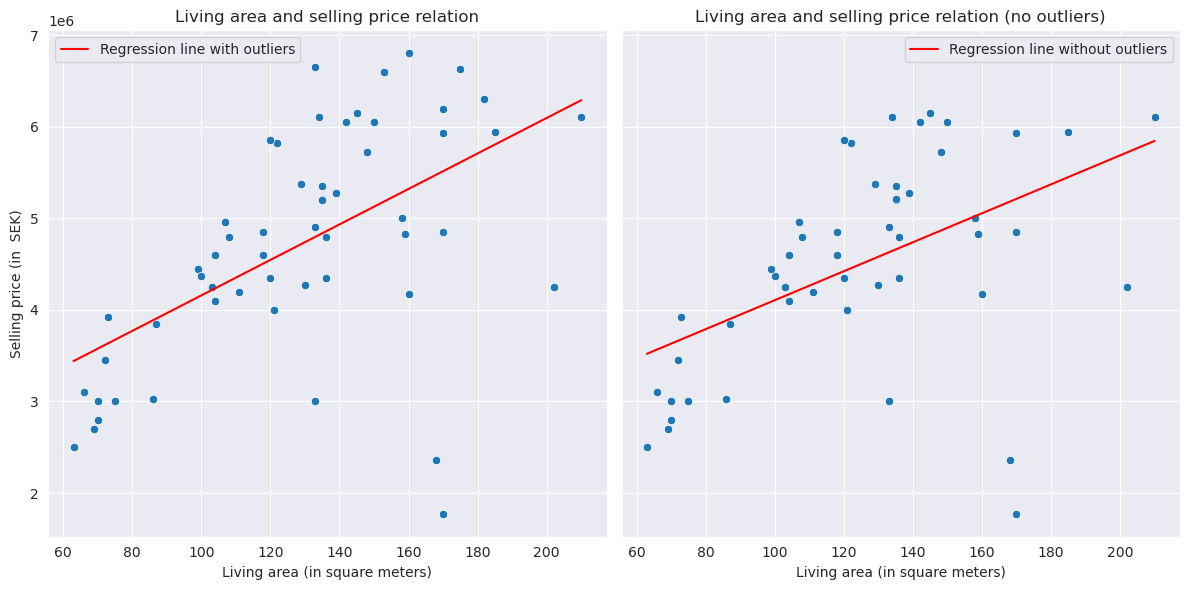

In [125]:
# comparison plots
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)

# plot for the regression model with outliers
make_scatter_plot(
    regression_hemnet_df['Living_area'], 
    regression_hemnet_df['Selling_price'],
    'Living area and selling price relation',
    'Living area (in square meters)',
    'Selling price (in  SEK)',
    ax1
)
sns.lineplot(
    x=regression_hemnet_df['Living_area'], 
    y=y_line(regression_hemnet_df['Living_area'], lr_model.coef_[0], lr_model.intercept_), 
    label=f'Regression line with outliers', 
    color='red',
    ax=ax1
)

# plot for the regression model without outliers
make_scatter_plot(
    df_no_outliers['Living_area'], 
    df_no_outliers['Selling_price'],
    'Living area and selling price relation (no outliers)',
    'Living area (in square meters)',
    'Selling price (in  SEK)',
    ax2
)
sns.lineplot(
    x=df_no_outliers['Living_area'], 
    y=y_line(df_no_outliers['Living_area'], lr_model_no_outliers.coef_[0], lr_model_no_outliers.intercept_), 
    label=f'Regression line without outliers', 
    color='red',
    ax=ax2
)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

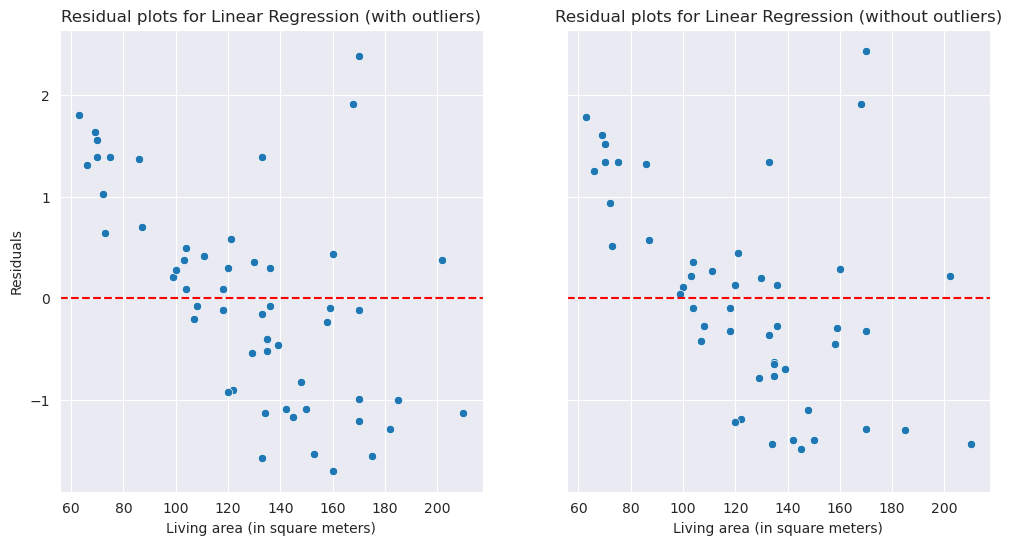

In [126]:
# comparison also for the residual plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)

make_scatter_plot(
    regression_hemnet_df['Living_area'],
    standardized_residuals.flatten(),
    'Residual plots for Linear Regression (with outliers)',
    'Living area (in square meters)',
    'Residuals',
    ax1
)
ax1.axhline(y=0,color='red',linestyle='--')

standardized_residuals_no_outliers = StandardScaler().fit_transform(
    np.array(true_target_values_no_outliers - prdicted_target_values_no_outliers).reshape(-1, 1)
).flatten()
make_scatter_plot(
    df_no_outliers['Living_area'],
    standardized_residuals_no_outliers,
    'Residual plots for Linear Regression (without outliers)',
    'Living area (in square meters)',
    'Residuals',
    ax2
)
ax2.axhline(y=0,color='red',linestyle='--')

plt.show()

In [127]:
# check the MSE of both the model
print(f'MSE score with outlier: {mean_squared_error(true_target_values, prdicted_target_values)}')
print(f'MSE score without outlier: {mean_squared_error(true_target_values_no_outliers, prdicted_target_values_no_outliers)}')

MSE score with outlier: 8.901689558381599e+21
MSE score without outlier: 5.360600323435198e+21


## Part 2: Classification

WRITE ABOUT THE CLASSIFICATION TASK INTRODUCTION HERE

### Import Dataset

In [128]:
from sklearn.datasets import load_iris

In [129]:
iris = load_iris()

In [130]:
# Create a Pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Optionally, you can add the target variable (species) to the DataFrame
iris_df['species'] = iris.target

In [131]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 1. Use a confusion matrix to evaluate the use of logistic regression to classify the Iris data set.

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#### Split the data into training and testing set

In order to create our model, we will split the data in 2 sets:

- Training set: The percentage of the original set that is going to be used to train the model.

- Test set: The percentage of the original set that is going to be used to test the trained model.

In [133]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#### Build the Logistic Regression Model

In [134]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Predict the values for the testing set

In [135]:
y_pred = logreg.predict(X_test)

#### Evaluate the model using a confusion matrix

In [136]:
confMat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confMat)

Confusion Matrix:
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


### 2. Use k-nearest neighbors to classify the Iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why?

#### Import Libraries

here we can briefly talk about the library that we need to preprocess, train, and then  evaluate knn

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#### Standardize the features

Before starting to manipulate the data, we will standardize the features as a method of data preparation. This is done to make sure that all the features are on the same scale, which can help the model learn more efficiently.

The notion of "closeness" or "distance" between data points plays a crucial role in the kNN algorithm as it uses distance metrics to find the k nearest neighbours. Obviously, depending on their scale, features may have a smaller/larger influence on the distance between points. By standardizing the features, all of them will contribute the same to the distance measure, lowering the chances of finding the wrong k nearest neighbours.

In [138]:
#Initialize the scaler
scaler = StandardScaler()

#Fit the scaler on the training data
scaler.fit(X_train)

#Transform the training and testing data
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

#### Build and train the kNN models for different k values. Predict the results for each model and save them

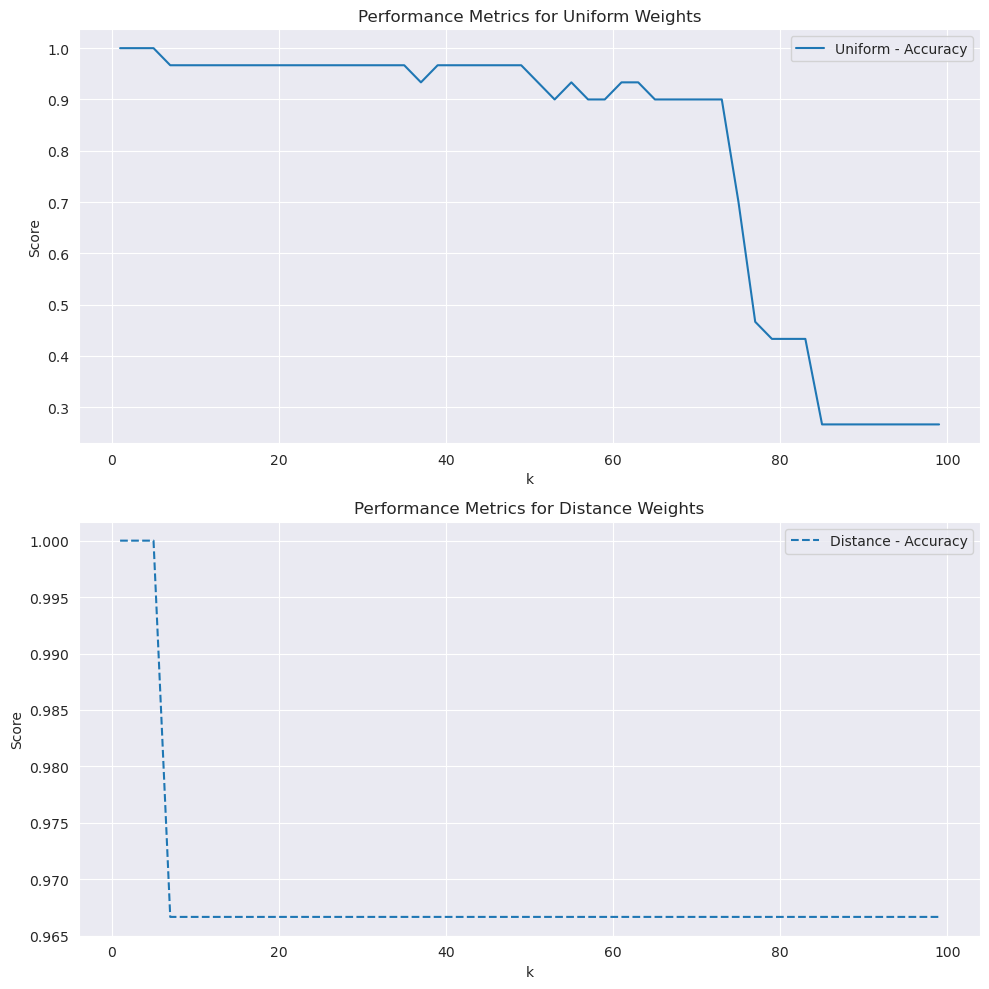

In [139]:
k_values = np.arange(1, 100, 2)
metrics_uniform = []
metrics_distance = []
for k in k_values:
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')

    knn_uniform.fit(X_train, y_train)
    knn_weighted.fit(X_train, y_train)

    y_pred_uniform = knn_uniform.predict(X_test)
    y_pred_distance = knn_weighted.predict(X_test)

    # Compute metrics for uniform weights 
    metrics_uniform.append(accuracy_score(y_test, y_pred_uniform))

    # Compute metrics for distance weights
    metrics_distance.append(accuracy_score(y_test, y_pred_distance))

# Create subplots: one for uniform weights and one for distance weights
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Plot metrics for uniform weights

axs[0].plot(k_values, metrics_uniform, label=f'Uniform - Accuracy')

axs[0].set_xlabel('k')
axs[0].set_ylabel('Score')
axs[0].set_title('Performance Metrics for Uniform Weights')
axs[0].legend()
axs[0].grid(True)

# Plot metrics for distance weights
axs[1].plot(k_values, metrics_distance, label=f'Distance - Accuracy', linestyle='--')

axs[1].set_xlabel('k')
axs[1].set_ylabel('Score')
axs[1].set_title('Performance Metrics for Distance Weights')
axs[1].legend()
axs[1].grid(True)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Show the plot
plt.show()

For this question we used k values going from 1 to 100 in steps of 2.

For each k value we trained and tested 2 models:

- Uniform kNN - selects the k nearest neighbours of the point, not taking into account their distance to it. All of the k neighbours contribute equally to the prediction, despite being at different distances.

- Distance-Based kNN - selects the k nearest neighbours  of the point, taking into account their distance to it. The k neighbours contribute differently to the prediction depending on how close they are to the point. The closer they are, the more they contribute.

The higher k gets, the lower the accuracies are on both models.

- The higher value k takes, the more points are taken into consideration. This means that more distant points, that potentially belong to different classes, are considered in the prediction, thus decreasing the accuracy of both models.

Now digging deep into the difference between the 2 models:

 In the uniform one, there is an enormous decrease on the accuracy whereas for the distance based one, in spite of decreasing, it is nowhere as meaningful as the first. One explanation for this could be:

- As mentioned above, increasing the value of k means considering more distant points. When using the uniform kNN, all points will contribute the same way for the prediction, meaning that points that are further away will count just as much as the closest ones. Points that belong to different classes will affect the prediction in the same way.

- On the other hand, the distance-based kNN takes the distance of the points into account, meaning that the further away a point is, the less it will contribute for the prediction. This will attenuate the effects of the continuous increase of the k value as contribution of the distant points will tend to 0. Points that belong to different classes will not affect the prediction in the same way.

To conclude, a better accuracy is obtained with the distance based kNN which means that, for this case, taking into account the distance between points is relevant, therefore the closer the points are, the more likely they are to belong to the same class.

### 3. Compare the classification models for the Iris data set that are generated by k-nearest neighbors (for the different settings from question 2) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models.

why choose kNN or linear model

kNN non linear - e. g. (circles)

logistic regression - linear

conclude whether a linear or a non linear method suits the problem better.

To calculate the confusion matrices, just need to select a k value that shows somewhat of a difference between the 2 kNN models.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8cfa57f0-6d90-4c5d-a7d6-29d1b561f0e2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>